## Data Denoising

In [1]:
import pandas as pd

df = pd.read_csv('./data/rent.csv')
print(df.shape)
df.head(3)

(21, 15)


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[u'https://photos.renthop.com/2/7211212_1ed454...,3000,792 Metropolitan Avenue
1,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[u'Doorman', u'Elevator', u'Fitness Center', u...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[u'https://photos.renthop.com/2/7150865_be3306...,5465,808 Columbus Avenue
2,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[u'Laundry In Building', u'Dishwasher', u'Hard...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[u'https://photos.renthop.com/2/6887163_de85c4...,2850,241 W 13 Street


In [2]:
df.head(3).T

,0,1,2
bathrooms,1.5,1,1
bedrooms,3,2,1
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130,c3ba40552e2120b0acfc3cb5730bb2aa
created,2016-06-24 07:54:24,2016-06-12 12:19:27,2016-04-17 03:26:41
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,,"Top Top West Village location, beautiful Pre-w..."
display_address,Metropolitan Avenue,Columbus Avenue,W 13 Street
features,[],"[u'Doorman', u'Elevator', u'Fitness Center', u...","[u'Laundry In Building', u'Dishwasher', u'Hard..."
interest_level,medium,low,high
latitude,40.7145,40.7947,40.7388
listing_id,7211212,7150865,6887163


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 15 columns):
bathrooms          21 non-null float64
bedrooms           21 non-null int64
building_id        21 non-null object
created            21 non-null object
description        21 non-null object
display_address    21 non-null object
features           21 non-null object
interest_level     21 non-null object
latitude           21 non-null float64
listing_id         21 non-null int64
longitude          21 non-null float64
manager_id         21 non-null object
photos             21 non-null object
price              21 non-null int64
street_address     21 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 2.5+ KB


In [4]:
df_num = df[['longitude','latitude','bedrooms','bathrooms','price']]
df_num.head(3)

,longitude,latitude,bedrooms,bathrooms,price
0,-73.9425,40.7145,3,1.5,3000
1,-73.9667,40.7947,2,1.0,5465
2,-74.0018,40.7388,1,1.0,2850


In [5]:
print(df_num.isnull().any())

longitude    False
latitude     False
bedrooms     False
bathrooms    False
price        False
dtype: bool


In [6]:
X_train = df_num.drop('price', axis=1)
y_train = df_num['price']

In [7]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)

In [8]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [9]:
error = rf.score(X_train, y_train)
print(error)

0.9581385988777059


In [13]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
rf.fit(X_train, y_train)
noisy_oob = rf.oob_score_
print('oob Score: ',noisy_oob)

('oob Score: ', 0.7000778037518235)


In [14]:
df_num.describe()

,longitude,latitude,bedrooms,bathrooms,price
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,-73.968681,40.770495,1.904762,1.214286,3825.619048
std,0.020752,0.041937,1.300183,0.405322,1749.662410
min,-74.002800,40.714500,0.000000,1.000000,1675.000000
25%,-73.981700,40.742700,1.000000,1.000000,2850.000000
50%,-73.967700,40.753900,2.000000,1.000000,3350.000000
75%,-73.949300,40.799900,3.000000,1.000000,5000.000000
max,-73.928000,40.864300,4.000000,2.000000,7995.000000


In [15]:
print(df_num.price.sort_values(ascending=False).head(10))

5     7995
13    6895
9     5800
7     5645
1     5465
18    5000
20    4395
19    3973
16    3650
6     3600
Name: price, dtype: int64


In [18]:
print(df_num.bathrooms.value_counts)

<bound method Series.value_counts of 0     1.5
1     1.0
2     1.0
3     1.0
4     1.0
5     2.0
6     1.0
7     2.0
8     1.0
9     2.0
10    1.0
11    1.0
12    1.0
13    2.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
Name: bathrooms, dtype: float64>


In [19]:
print(df_num.bedrooms.value_counts)

<bound method Series.value_counts of 0     3
1     2
2     1
3     1
4     4
5     4
6     2
7     1
8     1
9     4
10    0
11    1
12    2
13    2
14    1
15    0
16    2
17    1
18    4
19    1
20    3
Name: bedrooms, dtype: int64>


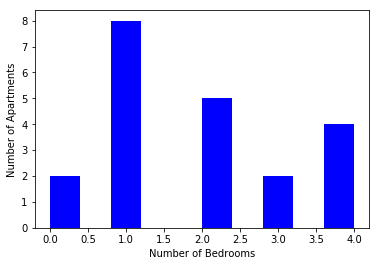

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.set_xlabel('Number of Bedrooms')
ax.set_ylabel('Number of Apartments')
ax.hist(df_num.bedrooms, color='blue');

In [24]:
print(len(df[(df.longitude == 0.0) & (df.latitude == 0.0)]))

0
